Epoch 1/20
7/7 [==============================] - 4s 8ms/step - loss: 0.2455
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1209
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0592
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0225
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 8.2437e-04
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 4.2498e-04
Epoch 8/20
7/7 [==============================] - 0s 8ms/step - loss: 9.5837e-05
Epoch 9/20
7/7 [==============================] - 0s 8ms/step - loss: 2.1899e-05
Epoch 10/20
7/7 [==============================] - 0s 6ms/step - loss: 3.6640e-05
Epoch 11/20
7/7 [==============================] - 0s 7ms/step - loss: 2.4564e-05
Epoch 12/20
7/7 [==============================] - 0s 6ms/step - loss: 8.7805e-06
Epoch 13/20
7/7 [============================

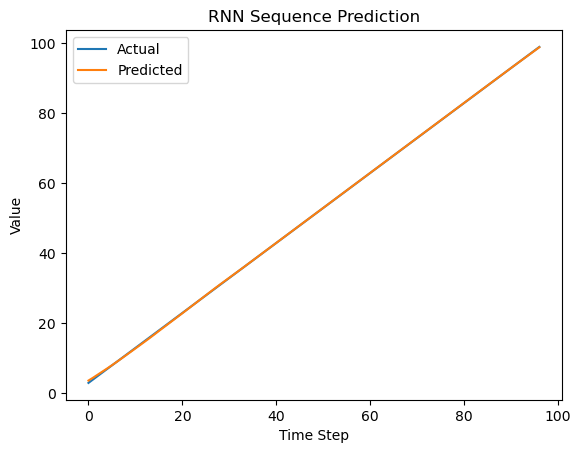

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate a simple sequence (e.g., numbers from 0 to 99)
sequence = np.array([i for i in range(100)]).reshape(-1, 1)

# Normalize the sequence
scaler = MinMaxScaler(feature_range=(0, 1))
sequence_scaled = scaler.fit_transform(sequence)

# Prepare the data for RNN (using previous 3 values to predict the next value)
X, y = [], []
for i in range(3, len(sequence_scaled)):
    X.append(sequence_scaled[i-3:i, 0])  # Last 3 values
    y.append(sequence_scaled[i, 0])  # The next value
X, y = np.array(X), np.array(y)

# Reshape X to be in the format [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=16)

# Predict the next value in the sequence
predicted = model.predict(X)

# Invert the scaling to get the actual values
predicted = scaler.inverse_transform(predicted)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results
plt.plot(y_actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title('RNN Sequence Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()


1. Explanation of Recurrent Neural Networks (RNNs)
Recurrent Neural Networks (RNNs) are a class of neural networks designed to handle sequential data. Unlike traditional neural networks, which assume that inputs are independent of each other, RNNs have connections that form cycles within the network, enabling them to retain information from previous time steps. This makes RNNs well-suited for tasks such as time series forecasting, natural language processing, and speech recognition.

Key Components of RNNs:
Recurrent Connections: The key feature of RNNs is that they have loops in the network. This means that the output from a previous step can be used as input to the current step, allowing the network to "remember" information from previous time steps.
Hidden States: In an RNN, each time step has a hidden state that carries information from the previous time step. The hidden state is updated at each step based on the input and the previous hidden state.
Activation Function: Like other neural networks, RNNs use activation functions (e.g., tanh or ReLU) to introduce non-linearity in the model.
Limitations of Traditional RNNs:
Vanishing Gradient Problem: In deep RNNs, gradients can become very small during backpropagation, making it difficult for the network to learn long-term dependencies. This issue is addressed by more advanced architectures like LSTMs and GRUs.
Short-term Memory: Traditional RNNs may struggle to remember long sequences of data, leading to limited performance in tasks requiring the model to retain long-term dependencies.
2. Importance of RNNs in Machine Learning
RNNs are particularly useful for:

Sequence Prediction: RNNs can model sequential dependencies in time series data, such as predicting stock prices or weather patterns.
Natural Language Processing (NLP): In tasks like sentiment analysis, machine translation, and speech recognition, RNNs are used to process sequences of text or speech.
Real-Time Applications: RNNs are capable of learning from streaming data, making them useful in real-time applications such as chatbot development or online recommendation systems.

#100DaysOfCodeDay25 #RecurrentNeuralNetwork #SequencePrediction